### Group 6:
### Xiaofeng Wang,     gusxiaofwa@student.gu.se
### Elias Kamyab,        eliaskamyab@gmail.com

<br>
<br>
<br>

# import libararies we need

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import tensorflow
print(tensorflow.__version__)
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
data_gen = ImageDataGenerator(rescale=1.0/255)

1.13.1


# the generator of images

In [3]:
imgdir = 'a5_images'
img_size = 64
batch_size = 32
train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle = True)

imgdir = 'a5_images'
img_size = 64
batch_size = 32
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle = True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


### get the shape of two datasets

In [4]:
# we get labels for training and validation data.
Xbatch, Ybatch = train_generator.next()
Xtestbatch, Ytestbatch = train_generator.next()
print(Xbatch.shape)
print(Ybatch.shape)
print(Xtestbatch.shape)
print(Ytestbatch.shape)

(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)


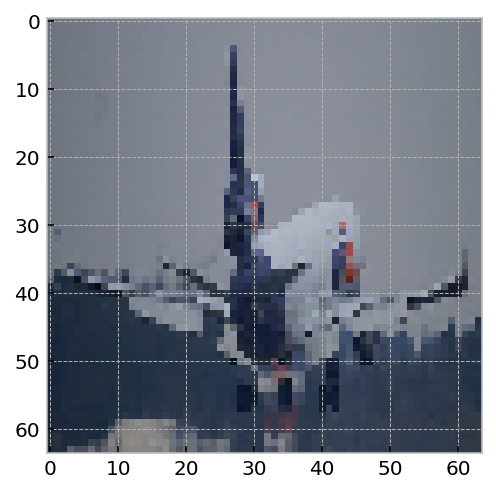

In [5]:
# plot a picture
from matplotlib import pyplot as plt
plt.style.use('bmh')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.imshow(Xbatch[0])

# Part 1: Training a convolutional neural network

## Write a function make_convnet that builds a convolutional neural network.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import callbacks

def make_convent(input_shape):
    your_cnn = Sequential()
    your_cnn.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
    your_cnn.add(MaxPooling2D(pool_size = (2, 2)))
    your_cnn.add(Flatten())
    your_cnn.add(Dense(units = 128, activation = 'relu'))
    your_cnn.add(Dense(units = 1, activation = 'sigmoid'))
    your_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return your_cnn

your_cnn = make_convent((64, 64, 3))

Instructions for updating:
Colocations handled automatically by placer.


## train the CNN

In [7]:
# early stopping
cb = callbacks.EarlyStopping(monitor= 'val_loss', min_delta=0, patience=10, verbose=0, mode = 'auto')

# we caculate it by size of training_set/batch_size = 1600/32
number_of_batches_in_training_set = 50
# we caculate it by size of validation_set/batch_size = 576/32
number_of_batches_in_validation_set = 20

# we use data_gen.flow_from_directory again to get our training_set and test_set.
training_set = train_generator
test_set = validation_generator

# train our cnn
history = your_cnn.fit_generator(training_set,
        validation_data = test_set,
        epochs = 100,
        steps_per_epoch = number_of_batches_in_training_set,
        validation_steps = number_of_batches_in_validation_set,
        callbacks=[cb]
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 13s 262ms/step - loss: 0.8015 - acc: 0.5900 - val_loss: 0.6112 - val_acc: 0.6328
Epoch 2/100
50/50 [==============================] - 9s 185ms/step - loss: 0.4897 - acc: 0.7762 - val_loss: 0.5031 - val_acc: 0.7641
Epoch 3/100
50/50 [==============================] - 10s 199ms/step - loss: 0.3523 - acc: 0.8600 - val_loss: 0.5189 - val_acc: 0.7422
Epoch 4/100
50/50 [==============================] - 9s 171ms/step - loss: 0.2442 - acc: 0.9131 - val_loss: 0.5127 - val_acc: 0.7828
Epoch 5/100
50/50 [==============================] - 10s 203ms/step - loss: 0.1663 - acc: 0.9513 - val_loss: 0.5988 - val_acc: 0.7703
Epoch 6/100
50/50 [==============================] - 9s 180ms/step - loss: 0.1102 - acc: 0.9756 - val_loss: 0.5943 - val_acc: 0.7812
Epoch 7/100
50/50 [==============================] - 10s 205ms/step - loss: 0.0725 - acc: 0.9862 - val_loss: 0.8396 - val_acc: 0.7203
Epoch 8/100
50/50

## Plot the training and validation loss for each epoch (until early stopping) and plot the training and validation accuracies in another plot.

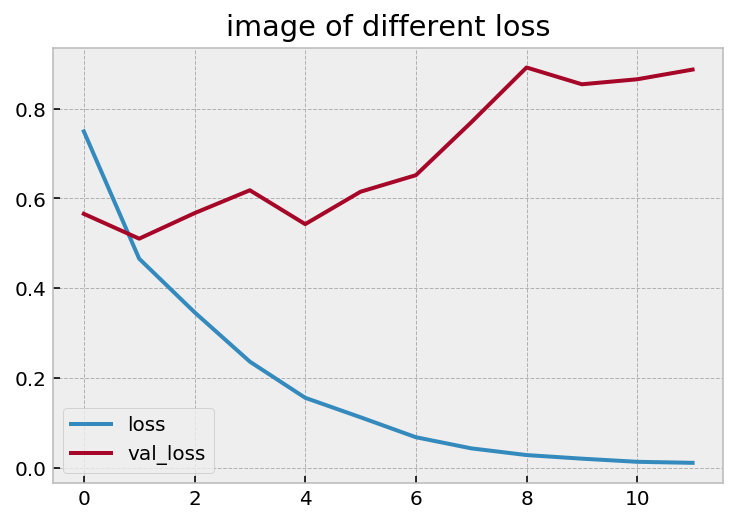

Text(0.5, 1.0, 'image of different acc')

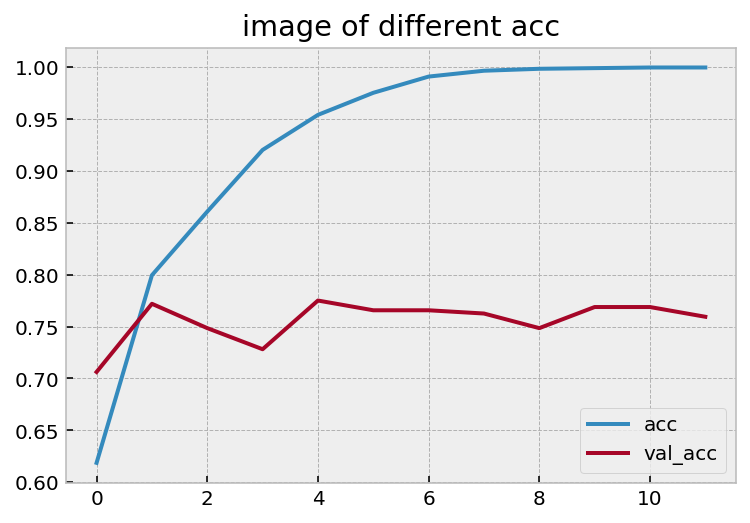

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('loss', 'val_loss'), loc='lower left')
plt.title('image of different loss')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(('acc', 'val_acc'), loc='lower right')
plt.title('image of different acc')

<br>
<br>
<br>

# Part 2: Data augmentation

## make a new ImageDataGenerator, here we use horizontal_flip and vertical_flip to do some random change for our picture

In [8]:
data_gen2 = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        vertical_flip = True)

## we generate new training set using this new ImageDataGenerator.

In [9]:
new_train_generator = data_gen2.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle = True)

Found 1600 images belonging to 2 classes.


## train our cnn using this new training data generator.

In [10]:
your_cnn2 = make_convent((64, 64, 3))

cb = callbacks.EarlyStopping(monitor= 'val_loss', min_delta=0,
patience=10, verbose=0, mode = 'auto')

number_of_batches_in_training_set = 50
number_of_batches_in_validation_set = 20

history2 = your_cnn2.fit_generator(new_train_generator,
        validation_data = test_set,
        epochs = 100,
        steps_per_epoch = number_of_batches_in_training_set,
        validation_steps = number_of_batches_in_validation_set,
        callbacks=[cb]
                                )

Epoch 1/100
50/50 [==============================] - 10s 200ms/step - loss: 0.7534 - acc: 0.6069 - val_loss: 0.6264 - val_acc: 0.6359
Epoch 2/100
50/50 [==============================] - 9s 186ms/step - loss: 0.5884 - acc: 0.7037 - val_loss: 0.6043 - val_acc: 0.6594
Epoch 3/100
50/50 [==============================] - 9s 182ms/step - loss: 0.5315 - acc: 0.7394 - val_loss: 0.5553 - val_acc: 0.7406
Epoch 4/100
50/50 [==============================] - 9s 182ms/step - loss: 0.5189 - acc: 0.7544 - val_loss: 0.5611 - val_acc: 0.7172
Epoch 5/100
50/50 [==============================] - 9s 181ms/step - loss: 0.4715 - acc: 0.7844 - val_loss: 0.5169 - val_acc: 0.7469
Epoch 6/100
50/50 [==============================] - 9s 182ms/step - loss: 0.4348 - acc: 0.8113 - val_loss: 0.5537 - val_acc: 0.7312
Epoch 7/100
50/50 [==============================] - 9s 183ms/step - loss: 0.4316 - acc: 0.8056 - val_loss: 0.5399 - val_acc: 0.7594
Epoch 8/100
50/50 [==============================] - 9s 184ms/step -

## Plot the training and validation loss for each epoch (until early stopping) and plot the training and validation accuracies in another plot.

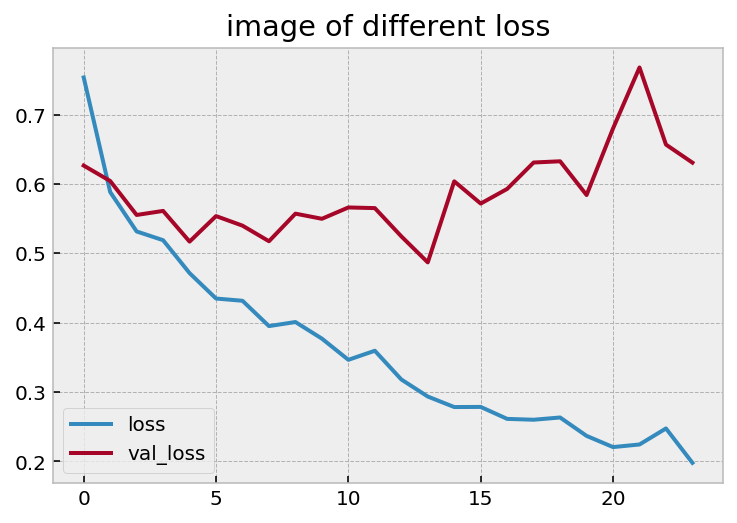

Text(0.5, 1.0, 'image of different acc')

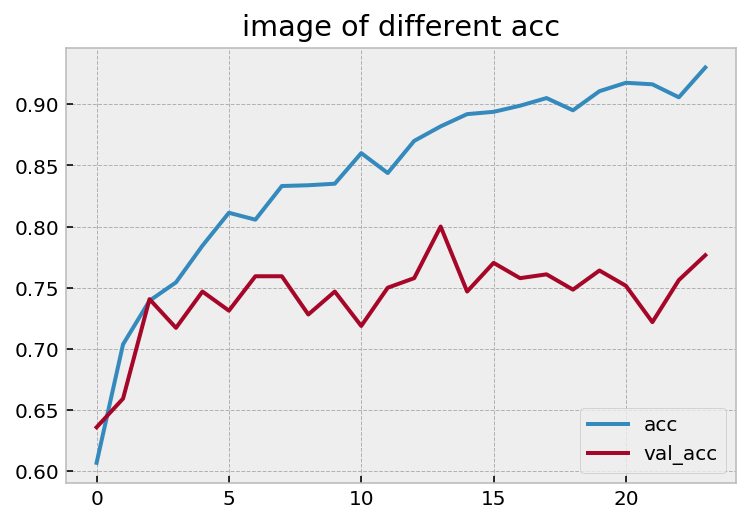

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(('loss', 'val_loss'), loc='lower left')
plt.title('image of different loss')
plt.show()
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.legend(('acc', 'val_acc'), loc='lower right')
plt.title('image of different acc')

<br>
<br>
<br>
<br>
<br>
<br>

# Interlude: Applying a pre-trained convolutional neural network

In [15]:
# enough to be executed once 
import tensorflow as tf 
from keras import applications
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

vggmodel = vggmodel.add(Activation(tf.nn.softmax))
vggmodel = applications.VGG16(include_top=True, weights='imagenet')

NameError: name 'vggmodel' is not defined

In [ ]:
""" SELECT one image from your training or validation data """
""" Load the image using load_img """  
image1 = load_img('a5_images/a5_images/validation/car/0004.jpg', target_size = (224, 224))   # 1 for car
image2 = load_img('a5_images/a5_images/validation/other/0004.jpg', target_size = (224, 224)) # o for other
plt.imshow(image1)
plt.show()
plt.imshow(image2)

In [ ]:
""" Convert the image into a 3-dimensional NumPy array using img_to_array. """
imag1 = img_to_array(image1)
imag2 = img_to_array(image2)
imag1.shape

In [ ]:
""" Process the image using the Keras function preprocess_input """
imag1_new = preprocess_input(imag1)
imag2_new = preprocess_input(imag2)

print(imag1_new.shape)
type(imag1_new)

In [ ]:
""" reshape the image array into a four-dimensional array """
x1 = imag1_new.reshape(1, 224, 224, 3)
x2 = imag2_new.reshape(1, 224, 224, 3)

x2.shape

In [ ]:
""" Predict the class probabilities for this image """
p1 = vggmodel.predict(x1)
p2 = vggmodel.predict(x2)

p1.shape

In [ ]:
""" Apply the function decode_prediction to the output of the previous step. 
    This will convert the probability matrix into human-readable ImageNet class labels. 
    Does the prediction make sense? """

In [ ]:
#from keras.applications.vvg16 import decode_predictions
decode_predictions(p1) # the original picture was part of a private car, almost good prediction

In [ ]:
decode_predictions(p2) # the original picture was a bicycle, predited with pro. 0.73

<br>
<br>
<br>
<br>
<br>
<br>

# Part 3: Using VGG-16 as a feature extractor

## we use a new ImageDataGenerator since we need to use preprocess_input if we want to use VGG16 model.

In [ ]:
from keras.applications.resnet50 import preprocess_input
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

## we generate our training data and validation data using this new ImageDataGenerator.

In [ ]:
train_generator1 = vgg_data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle = False)

validation_generator1 = vgg_data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle = False)

## import VGG16 model.

In [ ]:
from keras import applications
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

## generate our new feature for traing data using VGG16 and save them in file 'part3'

In [ ]:
training = feature_extractor.predict_generator(train_generator1)

with open('part3', 'wb') as f:
  np.save(f, training)

## generate our new feature for validation data using VGG16 and save them in file 'part3_test'

In [ ]:
test = feature_extractor.predict_generator(validation_generator1)

with open('part3_test', 'wb') as f:
  np.save(f, test)

## read the feature of training data and check the shape 

In [ ]:
with open('part3', 'rb') as f:
    the_data_train = np.load(f)

a=np.shape(the_data_train)
a

## read the feature of validation data and check the shape 

In [ ]:
with open('part3_test', 'rb') as f:
    the_data_test = np.load(f)
    
b=np.shape(the_data_test)
b

## using the function train_on_cnnfeatures that trains a classifier on the training set, and evaluates on the validation set. Since we use VGG16 model, we don't need to use convolution and pooling.

In [ ]:
def train_on_cnnfeatures(input_shape):
    your_cnn = Sequential()
    your_cnn.add(Flatten())
    your_cnn.add(Dense(units = 128, activation = 'relu'))
    your_cnn.add(Dense(units = 1, activation = 'sigmoid'))
    your_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return your_cnn

# here we use new input in our function train_on_cnnfeatures
your_cnn2 = train_on_cnnfeatures(2, 2, 512)   

## get our label for training and test data 

In [ ]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

# 1600 is the size of training data
train_label=get_labels(1600)
# 576 is the size of test data
test_label=get_labels(576)

## train our new model with new features. The accuracy is improved a lot.

In [ ]:
history5 = your_cnn2.fit(the_data_train,
        train_label,
        epochs = 30,
        validation_data=(the_data_test, test_label))                        

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Part 4: Visualizing the learned features

## We will now visualize these features in the VGG-16 model and get out new first_layer_weights

In [ ]:
first_layer_weights = feature_extractor.get_weights()[0]
first_layer_weights.shape

## We create a utility function that will help us visualize the patterns extracted by the first convolutional layer.

In [ ]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 
    return k

## visualize some of the patterns used by the first convolutional layer. For each convolutional filter we plot the positive and negative pattern.

In [ ]:
import pylab as plt
import numpy as np
for i in range(0,64):
    pos = kernel_image(first_layer_weights, i, True) 
    #else:
    neg = kernel_image(first_layer_weights, i, False) 

    plt.subplot(1, 2, 1)
    imp = plt.imshow(pos, cmap='hot')
    plt.colorbar(imp, orientation='horizontal')

    plt.subplot(1, 2, 2)
    im = plt.imshow(neg, cmap='hot')
    plt.colorbar(im, orientation='horizontal')

    plt.show()